In [1]:
import numpy as np
import theano
import theano.tensor as T
import lasagne

import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import os
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

from prepare_images import prep_image
from vgg16 import build_model

Using gpu device 0: GeForce GT 640M (CNMeM is disabled, cuDNN not available)


In [2]:
IMAGE_MEAN = [[[ 103.939]],  [[ 116.779]], [[ 123.68 ]]]

In [3]:
X = []
y = []

for cls in xrange(10):
    for fn in os.listdir('./leedsbutterfly/classes/{}'.format(cls+1)):
        _, im = prep_image('./leedsbutterfly/classes/{}/{}'.format(cls+1, fn), IMAGE_MEAN=IMAGE_MEAN)
        X.append(im)
        y.append(cls)
        
X = np.concatenate(X)
y = np.array(y).astype('int32')
print X.shape
print y.shape

(832, 3, 224, 224)
(832,)


In [4]:
# Split data into training, testing and validation set
rng = np.random.RandomState(0)
permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
train_idxs, test_idxs = train_test_split(range(len(y)),  random_state=0)
train_idxs, val_idxs = train_test_split(range(len(train_idxs)),  random_state=0)

X_train = X[train_idxs]
y_train = y[train_idxs]

X_val = X[val_idxs]
y_val = y[val_idxs]

X_test = X[test_idxs]
y_test = y[test_idxs]

print X_train.shape, y_train.shape
print X_val.shape, y_val.shape
print X_test.shape, y_test.shape
# check training data contains examples from all classes in good number
print sum(y_train==0)
print sum(y_train==1)
print sum(y_train==2)
print sum(y_train==3)
print sum(y_train==4)
print sum(y_train==5)
print sum(y_train==6)
print sum(y_train==7)
print sum(y_train==8)
print sum(y_train==9)

(468, 3, 224, 224) (468,)
(156, 3, 224, 224) (156,)
(208, 3, 224, 224) (208,)
47
47
30
52
55
55
48
32
56
46


In [5]:
with open('saved_model1.pkl', 'rb') as input:
    model = pickle.load(input)

net = build_model()
net['scores'] = lasagne.layers.DenseLayer(net['fc7_dropout'], num_units=10, 
                                          nonlinearity=lasagne.nonlinearities.softmax)
lasagne.layers.set_all_param_values(net['scores'], model)

X_input = T.tensor4()
output = lasagne.layers.get_output(net['scores'], X_input)
pred = output.argmax(-1)
predict_fn = theano.function([X_input], pred)

In [6]:
species = {0:'Danaus plexippus', 1:'Heliconius charitonius', 2:'Heliconius erato', 3:'Junonia coenia', 
          4:'Lycaena phlaeas', 5:'Nymphalis antiopa', 6:'Papilio cresphontes', 7:'Pieris rapae', 
          8:'Vanessa atalanta', 9:'Vanessa cardui'}

In [7]:
def classify(img_name, predict_fn, species):
    X_unseen = []
    rawim, im = prep_image(img_name)
    plt.imshow(rawim)
    X_unseen.append(im)
    X_unseen = np.concatenate(X_unseen)
    y_pred = int(''.join(map(str, predict_fn(X_unseen))))
    return y_pred

its Nymphalis antiopa


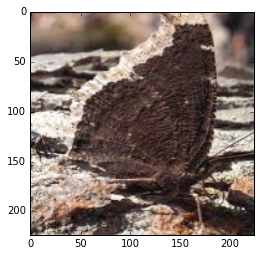

In [8]:
y_pred = classify('unseennymphalisantiopa.jpg', predict_fn, species)
print "its %s" %(species[y_pred])

In [9]:
y_test_pred = predict_fn(X_test)

In [10]:
print np.mean(y_test==y_test_pred)

0.990384615385


In [11]:
print confusion_matrix(y_test, y_test_pred)

[[19  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  1  0  0  0  1 20]]
